In [1]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

#imports for visualisations
import matplotlib.pyplot as plt

#import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import unidecode

# importing libraries for NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import regexp_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV

#importing libraries for modelling
import sklearn.metrics as metrics
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix ,classification_report
from scipy.spatial.distance import correlation
from scipy import stats 
from scipy.stats import kurtosis,skew
import os
import json

In [2]:
print(os.getcwd())
os.chdir(r"C:\Users\User\Desktop\ga_class\capstone\part_01\yelp")
print(os.getcwd())

C:\Users\User\Desktop\ga_class\capstone\part_01\yelp\github_example\NLP\EDA_final
C:\Users\User\Desktop\ga_class\capstone\part_01\yelp


In [3]:
# import clean datasets processed from 'preprocessing_and_nlp_model' workbook
business = pd.read_csv('business_clean.csv')
review = pd.read_csv('review_clean.csv')
refer_business = pd.read_csv('refer_business.csv')
business_rest_or_food_only = pd.read_csv('business_rest_or_food_only.csv')
attributes_df = pd.read_csv('attributes_df.csv')
business2 = pd.read_csv('business2.csv')
df_merge = pd.read_csv('df_merge.csv')
review_df = pd.read_csv('review_df.csv')

In [479]:
business.shape,review.shape

((150346, 10), (895930, 6))

In [392]:
# # "Port of Subs"
# business[business['name']=="Port of Subs"]

# 1. Create business_sentiment df 

In [67]:
# only focus on business that is still operating
business_sentiment = business_rest_or_food_only[business_rest_or_food_only['is_open']==1]

In [70]:
business_sentiment.drop(columns=['attributes','categories'],inplace=True)

In [71]:
business_sentiment = business_sentiment[business_sentiment['state']=='PA']

In [72]:
business_sentiment.shape

(3567, 9)

In [482]:
business_sentiment.head()

,business_id,name,city,state,stars,review_count,is_open,summary_category,label
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,4.0,80,1,Restaurants,restaurant
7,ABxoFuzZy5mqQ8C5FJJajQ,Core de Roma,Bala Cynwyd,PA,5.0,12,1,Restaurants,restaurant
15,ppFCk9aQkM338Rgwpl2F5A,Wawa,Philadelphia,PA,3.0,56,1,Restaurants,restaurant
21,3BJxm-HnvzdwD1zjmSbmyQ,Golden Chopstick Chinese Restaurant,Philadelphia,PA,3.0,137,1,Restaurants,restaurant
28,1GnJDrpp-jyDRCptavD9RQ,Rita's Italian Ice,Aston,PA,4.0,7,1,Food,restaurant


# 2. Create review_sentiment df

In [73]:
review_sentiment = review_df
review_sentiment.drop(columns=['user_id','text'],inplace=True)

In [75]:
review_sentiment['text_fix'] = review_sentiment['text_fix'].astype(str)

In [81]:
review_sentiment.shape

(479508, 5)

In [483]:
review_sentiment.head()

,business_id,review_id,stars,useful,text_fix,polarity
0,MTSW4McQd7CbVtyjqoe9mw,BXQcBN0iAi1lAUxibGLFzA,4.0,0.0,this is nice little chinese bakery in the hear...,positive
1,MTSW4McQd7CbVtyjqoe9mw,uduvUCvi9w3T2bSGivCfXg,4.0,3.0,this is the bakery i usually go to in chinatow...,positive
2,MTSW4McQd7CbVtyjqoe9mw,a0vwPOqDXXZuJkbBW2356g,5.0,0.0,"a delightful find in chinatown! very clean, an...",positive
3,MTSW4McQd7CbVtyjqoe9mw,MKNp_CdR2k2202-c8GN5Dw,5.0,5.0,i ordered a graduation cake for my niece and i...,positive
4,MTSW4McQd7CbVtyjqoe9mw,_hJu0u6nB-8LIeQJY4Vg4w,4.0,1.0,this is my favorite bakery in chinatown! i usu...,positive


In [76]:
#create list to store sentiment score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()
sentiment_score = []

for i in review_sentiment['text_fix']:
    sentiment_score.append(sent.polarity_scores(i))

# 3. Create sentiment_score_df

In [77]:
sentiment_score_df = pd.DataFrame(sentiment_score)
sentiment_score_df.mean()

neg         0.058457
neu         0.772400
pos         0.169143
compound    0.448608
dtype: float64

In [346]:
sentiment_score_df.shape

(479508, 7)

In [347]:
sentiment_attribute.shape

(80258, 130)

In [484]:
sentiment_score_df['score'] = review_sentiment['stars']

In [485]:
sentiment_score_df.head(1)

,neg,neu,pos,compound,polarity,business_id,score
0,0.043,0.723,0.234,0.939,positive,MTSW4McQd7CbVtyjqoe9mw,4.0


In [486]:
# Check reviewer raanking for each polarity
s = sentiment_score_df[sentiment_score_df['polarity']== 'negative']

In [358]:
#for neutral polarity, the mean rating/score is around 2.1.
#there is still outlier such as max value 5 for polarity neutral that need to be dropped
s.describe()

,neg,neu,pos,compound,score
count,20899.000000,20899.000000,20899.000000,20899.0,5141.000000
mean,0.001717,0.996478,0.001802,0.0,2.182260
std,0.013438,0.027550,0.014170,0.0,1.247115
min,0.000000,0.511000,0.000000,0.0,1.000000
25%,0.000000,1.000000,0.000000,0.0,1.000000
50%,0.000000,1.000000,0.000000,0.0,2.000000
75%,0.000000,1.000000,0.000000,0.0,3.000000
max,0.244000,1.000000,0.263000,0.0,5.000000


In [355]:
#positive
s.describe()

,neg,neu,pos,compound,score
count,350012.000000,350012.000000,350012.000000,350012.000000,350012.000000
mean,0.036331,0.749760,0.213909,0.800351,3.422988
std,0.038822,0.106076,0.111178,0.231974,1.290106
min,0.000000,0.167000,0.009000,0.000100,1.000000
25%,0.000000,0.691000,0.131000,0.724900,2.000000
50%,0.029000,0.765000,0.191000,0.902000,4.000000
75%,0.060000,0.825000,0.275000,0.962600,5.000000
max,0.319000,0.991000,0.833000,0.999800,5.000000


In [487]:
#negative
s.describe()

,neg,neu,pos,compound,score
count,108597.000000,108597.000000,108597.000000,108597.000000,108597.000000
mean,0.140692,0.802247,0.057064,-0.598741,1.675405
std,0.069521,0.086887,0.043501,0.273407,0.860206
min,0.008000,0.173000,0.000000,-0.998000,1.000000
25%,0.093000,0.753000,0.025000,-0.839800,1.000000
50%,0.127000,0.814000,0.055000,-0.647800,1.000000
75%,0.173000,0.864000,0.084000,-0.381400,2.000000
max,0.827000,0.990000,0.290000,-0.000400,5.000000


+ for neutral polarity, the mean rating/score is around 2.1.
+ for positive polarity, mean rating is 3.4
+ for negative polarity, mean rating is 1.7 
+ there is still outlier such as max value 5 for polarity neutral that need to be dropped

In [78]:
# above survey is used to simplify score in term of positive, negative and neutral sentiment
# change rating/score to postive if value more than 0, negative if value less than zero 
def true_polarity(x):
    if x > 0:
        return 'positive'
    if x < 0:
        return 'negative'
    else: return 'neutral'

In [489]:
sentiment_score_df['polarity'] = sentiment_score_df.compound.map(true_polarity)

In [490]:
sentiment_score_df.head(1)

,neg,neu,pos,compound,polarity,business_id,score
0,0.043,0.723,0.234,0.939,positive,MTSW4McQd7CbVtyjqoe9mw,4.0


In [82]:
sentiment_score_df['business_id'] = review_df['business_id']

In [87]:
review_sentiment['polarity'] = sentiment_score_df['polarity']

# 4. Create sentiment_df

In [95]:
# combine review_sentiment with business_sentiment
sentiment_df = pd.merge(business_sentiment,review_sentiment,on='business_id',how='left')

In [107]:
sentiment_df.rename(columns={'stars_x':'overall_stars','stars_y':'review_stars'},inplace=True)

In [109]:
sentiment_df.dropna(inplace=True)

In [115]:
sentiment_df.drop(columns=['label'],inplace=True)

In [127]:
#convert datatypes other than feature business id as category
for i in refer_attribute.columns:
    if i != 'business_id':
        refer_attribute[i] = refer_attribute[i].astype('category')

In [126]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
for i in refer_attribute.columns:
    if i != 'business_id':
        refer_attribute[i] = le.fit_transform(refer_attribute[i])

In [132]:
columns_not_category=['business_id','name','city','state','summary_category','polarity','overall_stars','review_stars']
for i in sentiment_df.columns:
    if i not in  columns_not_category:
        sentiment_df[i] = sentiment_df[i].astype('category')

# 5. Create sentiment_attribute

In [133]:
sentiment_attribute = pd.merge(sentiment_df,refer_attribute,on='business_id',how='left')

In [492]:
sentiment_attribute.head(1)

,business_id,name,city,state,overall_stars,review_count,is_open,summary_category,review_id,review_stars,...,Corkage_None,Corkage_True,Open24Hours_False,Open24Hours_True,AgesAllowed_u'21plus',AgesAllowed_u'allages',RestaurantsCounterService_True,AcceptsInsurance_False,AcceptsInsurance_True,new_polarity
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,4.0,80,1,Restaurants,BXQcBN0iAi1lAUxibGLFzA,4.0,...,0,0,0,0,0,0,0,0,0,positive


In [135]:
sentiment_attribute.dropna().shape

(80258, 130)

In [316]:
sentiment_df.shape,sentiment_attribute.shape

((80258, 13), (80258, 131))

In [138]:
sentiment_attribute.drop(columns=['label'],inplace=True)

In [320]:
sentiment_attribute.drop(columns=['Unnamed: 0'],inplace=True)

In [322]:
sentiment_attribute['polarity'] = sentiment_df['polarity']

In [380]:
sentiment_attribute['review_stars'].value_counts()

4.0    16959
5.0    16071
2.0    15964
1.0    15776
3.0    15488
Name: review_stars, dtype: int64

In [142]:
#summary of created dataframes
# contain overall star and label
business_sentiment.to_csv('business_sentiment.csv')

# contain text,polarity
review_sentiment.to_csv('review_sentiment.csv')

# contain business,review details,text with no attributes 
sentiment_df.to_csv('sentiment_df.csv')

# contain business,review details,text,overall star, review_stars with attributes
sentiment_attribute.to_csv('sentiment_attribute.csv')

In [375]:
# create dataframe to compare reviewer's star based on polarity
# this is to ensure the polarity function define before is sensible to rating's scale
neutral_df = sentiment_attribute[sentiment_attribute['polarity']=='neutral']
positive_df = sentiment_attribute[sentiment_attribute['polarity']=='positive']
negative_df = sentiment_attribute[sentiment_attribute['polarity']=='negative']

In [493]:
neutral_df.review_stars.value_counts()

3.0    15488
Name: review_stars, dtype: int64

In [381]:
positive_df.review_stars.value_counts()

4.0    16959
5.0    16071
Name: review_stars, dtype: int64

In [382]:
negative_df.review_stars.value_counts()

2.0    15964
1.0    15776
Name: review_stars, dtype: int64

Based on above evaluation. The mapped function of polarity is done accordingly aligned with rating's scale

In [396]:
# create dataframe to use in training model
x = sentiment_attribute

In [397]:
# positive polarity (value greater than 3 is put as 4)
# positive polarity (value greater than 3 is put as 1)
def normalize_star(x):
    if x > 3:
        x = 4
        return x
    if x == 3:
        x = 3
        return x
    if x < 3:
        x = 1
        return x

In [398]:
def change_polarity(x):
    if x > 3:
        return 'positive'
    if x == 3:
        return 'neutral'
    if x < 3:
        return 'negative'

In [399]:
x['new_polarity'] = x.review_stars.map(change_polarity)

In [407]:
x.polarity = x.new_polarity
x = x.drop(columns=['new_polarity'])

In [408]:
x.overall_stars = x.overall_stars.map(normalize_star) 

In [409]:
x.review_stars = x.review_stars.map(normalize_star) 

In [410]:
x.review_stars.value_counts()

4    33030
1    31740
3    15488
Name: review_stars, dtype: int64

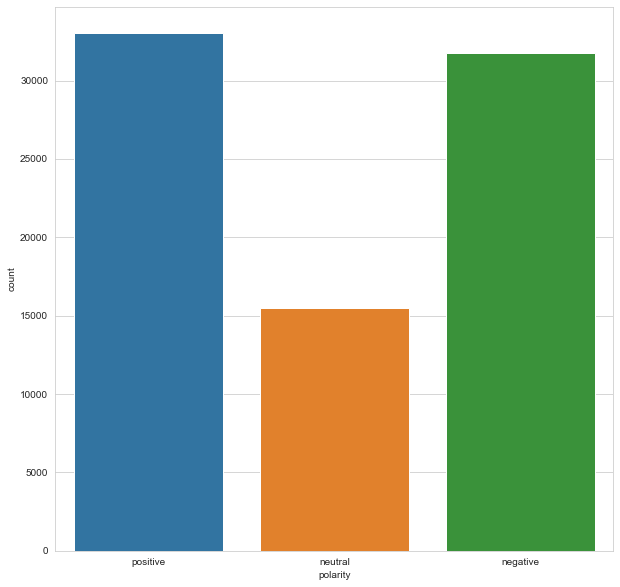

In [405]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="polarity", data=x)

from diagram above, dataframe now is unbalance for category neutral. Need to do resampling method

# 6. Model Preparation

In [190]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestClassifier

In [237]:
# to_train = sentiment_attribute.drop(columns=['business_id','review_id','review_stars','name','city','state','text_fix'])
to_train1 = x.drop(columns=['business_id','review_id','review_stars','name','city','state','text_fix'])

In [238]:
to_train1['summary_category'] = le.fit_transform(to_train1['summary_category'])
to_train1['polarity'] = le.fit_transform(to_train1['polarity'])

In [239]:
to_train1.shape

(80258, 123)

In [561]:
to_train1

,overall_stars,review_count,is_open,summary_category,useful,polarity,garage,street,validated,lot,...,Corkage_False,Corkage_None,Corkage_True,Open24Hours_False,Open24Hours_True,AgesAllowed_u'21plus',AgesAllowed_u'allages',RestaurantsCounterService_True,AcceptsInsurance_False,AcceptsInsurance_True
0,4,80,1,1,0.0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,80,1,1,3.0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,80,1,1,0.0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,80,1,1,5.0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,80,1,1,1.0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80253,4,38,1,1,0.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
80254,4,38,1,1,0.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
80255,4,38,1,1,0.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
80256,4,38,1,1,0.0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


# 7. Multiclass Prediction

In [501]:
x.review_stars.value_counts()

4    33030
1    31740
3    15488
Name: review_stars, dtype: int64

In [256]:
X = to_train1
y = x.review_stars

In [257]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X,
                                                          y,
                                                          random_state=42)

In [497]:
# Baseline accuracy
y_train.value_counts(normalize=True)

4    24760
1    23846
3    11587
Name: review_stars, dtype: int64

# 7.1 Rebalance target variable

In [498]:
# show values to be balanced
y_train.value_counts()

4    24760
1    23846
3    11587
Name: review_stars, dtype: int64

### A. SMOTE

In [496]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res==3)))
print("After OverSampling, counts of label '4': {}".format(sum(y_train_res==4)))

After OverSampling, the shape of train_X: (74280, 123)
After OverSampling, the shape of train_y: (74280,) 

After OverSampling, counts of label '1': 24760
After OverSampling, counts of label '3': 24760
After OverSampling, counts of label '4': 24760


In [260]:
# Logistic Regression
logreg = LogisticRegression(
    solver='newton-cg',
    max_iter=500, 
    random_state=42,
)

logreg_params = {
    'clf__penalty': ['l2'],
    'clf__C': [0.1, 0.5, 1, 1.5, 2.5]
}

In [261]:
# Gradient Boost
gb = GradientBoostingClassifier(random_state=42)

gb_params = {
    'clf__learning_rate': [0.05, 0.1, 0.15],
    'clf__max_depth': [2, 3]
}

In [262]:
# Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_params = {
    'clf__n_estimators': [100, 150, 200],
    'clf__max_depth': [4, 5, 6]
}

In [263]:
# List of classifiers & params
classifiers = [
    (logreg, logreg_params),
    (gb, gb_params),
    (rf, rf_params)
]

In [264]:
# Instantiate list to store results
results = []

In [265]:
# Create function to gridsearch through models and store metrics
def model(clf, clf_params):
    
    # Instantiate pipeline
    pipe = Pipeline([
        ('ss', StandardScaler()),
        ('clf', clf)
    ])
    
    # Gridsearch for best estimator
    grid = GridSearchCV(
        pipe,
        param_grid=clf_params,
        scoring='roc_auc',
        verbose=2,
        n_jobs=-1
    )

    grid.fit(X_train, y_train)
    
    print(f'Classifier: {clf}')
    print('Best Parameters:')
    print(grid.best_params_)
    
    # Scoring metrics
    scores = {'Classifier': clf}
    y_preds = grid.predict(X_holdout)
    y_pred_probas = grid.predict_proba(X_holdout)[:, 1]
    y_train_pred_probas = grid.predict_proba(X_train)[:, 1]
    scores['F1'] = metrics.f1_score(y_holdout, y_preds,average='weighted')
    scores['Precision'] = metrics.precision_score(y_holdout, y_preds,average='weighted')
    scores['Recall'] = metrics.recall_score(y_holdout, y_preds,average='weighted')
    scores['Accuracy'] = metrics.accuracy_score(y_holdout, y_preds)
    
    # Storing results
    results.append(scores)
    
    return pipe

In [266]:
# Run through gridsearch for every model
for (clf, clf_params) in classifiers:
    model(clf, clf_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Classifier: LogisticRegression(max_iter=500, random_state=42, solver='newton-cg')
Best Parameters:
{'clf__C': 0.1, 'clf__penalty': 'l2'}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Classifier: GradientBoostingClassifier(random_state=42)
Best Parameters:
{'clf__learning_rate': 0.05, 'clf__max_depth': 2}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Classifier: RandomForestClassifier(n_jobs=-1, random_state=42)
Best Parameters:
{'clf__max_depth': 4, 'clf__n_estimators': 100}


In [196]:
# Classifier: LogisticRegression(max_iter=500, random_state=42, solver='liblinear')
# Best Parameters:
# Classifier: LogisticRegression(max_iter=500, random_state=42, solver='liblinear')
# Best Parameters:
# {'clf__C': 0.1, 'clf__penalty': 'l1'}
# Fitting 5 folds for each of 6 candidates, totalling 30 fits
# Classifier: GradientBoostingClassifier(random_state=42)
# Best Parameters:
# {'clf__learning_rate': 0.05, 'clf__max_depth': 2}
# Fitting 5 folds for each of 9 candidates, totalling 45 fits
# Classifier: RandomForestClassifier(n_jobs=-1, random_state=42)
# Best Parameters:
# {'clf__max_depth': 4, 'clf__n_estimators': 100}

In [244]:
# Results without normalize rating.
# Results sorted by holdout ROC-AUC
without_normal_star = pd.DataFrame(results).sort_values(by='F1', ascending=False).reset_index(drop=True)
without_normal_star

,Classifier,F1,Precision,Recall,Accuracy
0,GradientBoostingClassifier(random_state=42),0.361748,0.374068,0.392126,0.392126
1,"LogisticRegression(max_iter=500, random_state=...",0.358494,0.379874,0.393820,0.393820
2,"RandomForestClassifier(n_jobs=-1, random_state...",0.320200,0.375368,0.378271,0.378271


In [268]:
# Results with normalize rating and balance target.
# Results sorted by holdout ROC-AUC
with_normal_star = pd.DataFrame(results).sort_values(by='F1', ascending=False).reset_index(drop=True)

In [371]:
with_normal_star

,Classifier,F1,Precision,Recall,Accuracy
0,"LogisticRegression(max_iter=500, random_state=...",1.000000,1.000000,1.000000,1.000000
1,GradientBoostingClassifier(random_state=42),1.000000,1.000000,1.000000,1.000000
2,"RandomForestClassifier(n_jobs=-1, random_state...",0.721483,0.658457,0.804685,0.804685


Both table above show significantly varied score as data is balance. The performance of model is better with balance target  for all models.

In [269]:
lr_final =  LogisticRegression(C=0.1, penalty = 'l2')
lr_final.fit(X_train, y_train)
gboost_final = GradientBoostingClassifier(learning_rate = 0.05, max_depth = 2) 
gboost_final.fit(X_train, y_train)
rf_final = RandomForestClassifier(max_depth = 4, n_estimators = 100) 
rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [274]:
lr_final.score(X_train,y_train),lr_final.score(X_holdout,y_holdout) #train score, test score

(0.9977073746116658, 0.9978071268377772)

In [275]:
gboost_final.score(X_train,y_train),gboost_final.score(X_holdout,y_holdout)

(1.0, 1.0)

In [276]:
rf_final.score(X_train,y_train),rf_final.score(X_holdout,y_holdout)

(0.810542754140847, 0.8088213306753053)

In [417]:
# Roc_Auc score for logistic regression model
preds1 = lr_final.predict_proba(X_holdout)
roc_auc = roc_auc_score(y_holdout,preds1, multi_class='ovr')
print(f"ROC_AUC Score:{roc_auc}")

ROC_AUC Score:0.9998513937253023


In [270]:
#store result into dataframe
result_df = pd.DataFrame(results)
model_name = ['LogisticRegression','GradientBoostingClassifier','RandomForestClassifier']
result_df['model_name'] = model_name
model_var = [lr_final,gboost_final,rf_final]
result_df['model_var'] = model_var
result_df

,Classifier,F1,Precision,Recall,Accuracy,model_name,model_var
0,"LogisticRegression(max_iter=500, random_state=...",1.000000,1.000000,1.000000,1.000000,LogisticRegression,LogisticRegression(C=0.1)
1,GradientBoostingClassifier(random_state=42),1.000000,1.000000,1.000000,1.000000,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...
2,"RandomForestClassifier(n_jobs=-1, random_state...",0.721483,0.658457,0.804685,0.804685,RandomForestClassifier,"(DecisionTreeClassifier(max_depth=4, max_featu..."


Table above show that Gradient boosting and logistic regression own very good score for f1,and accuracy score

In [568]:
#save model
import joblib
import pickle

joblib.dump(lr_final, "lr_final.joblib")
joblib.dump(gboost_final, "gboost_final.joblib")
joblib.dump(rf_final, "rf_final.joblib")

['rf_final.joblib']

In [ ]:
# load model
# lr_final = joblib.load("lr_final.joblib")

In [529]:
# prediction
lr_pred = lr_final.predict(X_holdout)
gboost_pred = gboost_final.predict(X_holdout)
rf_pred = rf_final.predict(X_holdout)

In [532]:
# Let us now evaluate our model using confusion matrix and classification report
list_predict = [lr_pred,gboost_pred,rf_pred]
for i in list_predict:
    x = str(i)
    print(x)
    print('\n')
    print(classification_report(y_holdout, i))
    print(metrics.accuracy_score(y_holdout, i))
    print('\n')

[4 3 1 ... 1 4 3]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7894
           3       1.00      0.99      0.99      3901
           4       1.00      1.00      1.00      8270

    accuracy                           1.00     20065
   macro avg       1.00      1.00      1.00     20065
weighted avg       1.00      1.00      1.00     20065

0.9978071268377772


[4 3 1 ... 1 4 3]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7894
           3       1.00      1.00      1.00      3901
           4       1.00      1.00      1.00      8270

    accuracy                           1.00     20065
   macro avg       1.00      1.00      1.00     20065
weighted avg       1.00      1.00      1.00     20065

1.0


[4 1 1 ... 1 4 1]


              precision    recall  f1-score   support

           1       0.73      1.00      0.85      7894
           3       1.00      0.02      0.0

In [513]:
y_holdout.value_counts()

4    8270
1    7894
3    3901
Name: review_stars, dtype: int64

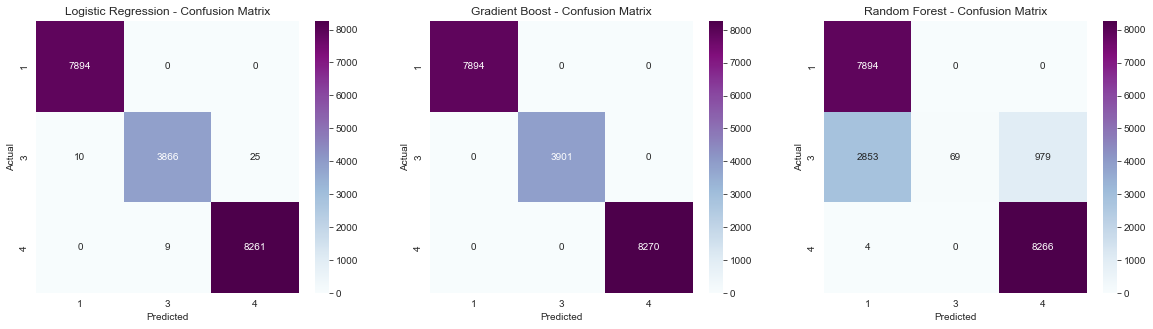

In [526]:
tick = [1,3,4]
lr_cm = confusion_matrix(y_holdout, lr_pred)
gboost_cm = confusion_matrix(y_holdout, gboost_final.predict(X_holdout))
rf_cm = confusion_matrix(y_holdout, rf_final.predict(X_holdout))

plt.figure(figsize=(20,5))
plt.subplot(131)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap="BuPu", xticklabels=tick, yticklabels=tick)
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(132)
sns.heatmap(gboost_cm, annot=True, fmt='d', cmap="BuPu", xticklabels=tick, yticklabels=tick)
plt.title('Gradient Boost - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(133)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap="BuPu", xticklabels=tick, yticklabels=tick)
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [554]:
# plot the logistic regression's importance feature that affect the score according to its importance
importances_lr = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': lr_final.coef_[0]
})
importances_lr = importances_lr.sort_values(by='Importance', ascending=False)

In [544]:
importances_lr.head(10)

,Attribute,Importance
46,dairy-free,0.577390
51,soy-free,0.577390
52,vegetarian,0.577390
48,vegan,0.577390
47,gluten-free,0.577390
94,HasTV_True,0.560501
4,useful,0.464111
80,RestaurantsGoodForGroups_True,0.457824
9,lot,0.432379
61,BusinessAcceptsCreditCards_True,0.388872


In [546]:
top10_lr_high = importances_lr.head(10)
top10_lr_low = importances_lr.tail(10)

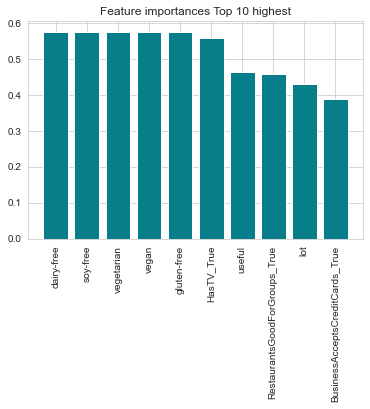

In [548]:
# top 10 highest importance
plt.bar(x=top10_lr_high['Attribute'], height=top10_lr_high['Importance'], color='#087E8B')
plt.title('Feature importances Top 10 highest', size=12)
plt.xticks(rotation='vertical')
plt.show()

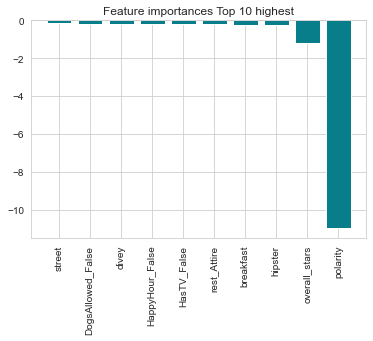

In [549]:
# top 10 lowest importance
plt.bar(x=top10_lr_low['Attribute'], height=top10_lr_low['Importance'], color='#087E8B')
plt.title('Feature importances Top 10 lowest', size=12)
plt.xticks(rotation='vertical')
plt.show()

In [550]:
# plot the logistic regression's importance feature that affect the score according to its importance
importances_gboost = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': gboost_final.feature_importances_
})
importances_gboost = importances_gboost.sort_values(by='Importance', ascending=False)

In [551]:
top10_gboost_high = importances_gboost.head(10)
top10_gboost_low = importances_gboost.tail(10)

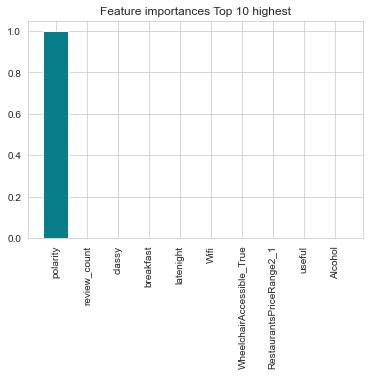

In [552]:
# top 10 highest importance
plt.bar(x=top10_gboost_high['Attribute'], height=top10_gboost_high['Importance'], color='#087E8B')
plt.title('Feature importances Top 10 highest', size=12)
plt.xticks(rotation='vertical')
plt.show()

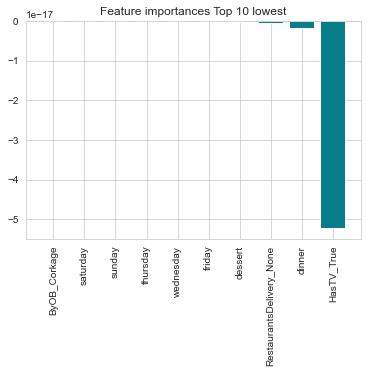

In [553]:
# top 10 lowest importance
plt.bar(x=top10_gboost_low['Attribute'], height=top10_gboost_low['Importance'], color='#087E8B')
plt.title('Feature importances Top 10 lowest', size=12)
plt.xticks(rotation='vertical')
plt.show()

In [555]:
# plot the logistic regression's importance feature that affect the score according to its importance
importances_rf = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': rf_final.feature_importances_
})
importances_rf = importances_rf.sort_values(by='Importance', ascending=False)

In [556]:
top10_rf_high = importances_rf.head(10)
top10_rf_low = importances_rf.tail(10)

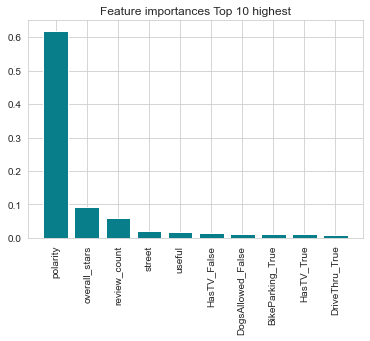

In [557]:
# top 10 highest importance
plt.bar(x=top10_rf_high['Attribute'], height=top10_rf_high['Importance'], color='#087E8B')
plt.title('Feature importances Top 10 highest', size=12)
plt.xticks(rotation='vertical')
plt.show()

# Plotting the ROC curves

In [473]:
preds2 = lr_final.predict(X_holdout)

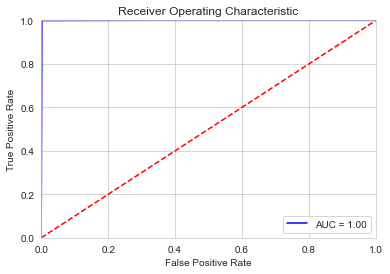

In [477]:
# Evaluating the model 

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()